# Import data 


In [5]:
import pandas as pd
import seaborn as sns
train_data = pd.read_csv("C:/Users/USER/OneDrive/Desktop/train.csv")
test_data = pd.read_csv("C:/Users/USER/OneDrive/Desktop/test.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# overview


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# feature engineering and eda

In [9]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"]+1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"]+1
train_data.groupby(['FamilySize'],as_index = False)['Survived'].agg(["count","mean"])

,FamilySize,count,mean
0,1,537,0.303538
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


In [10]:
train_data['Fam_type'] = pd.cut(train_data.FamilySize,[0,1,4,7,11],labels = ['Solo','Small','Medium','Big'])
test_data['Fam_type'] = pd.cut(test_data.FamilySize,[0,1,4,7,11],labels = ['Solo','Small','Medium','Big'])
train_data.groupby(['Fam_type'],as_index = False)['Survived'].agg(['count','mean'])

C:\Users\USER\AppData\Local\Temp\ipykernel_16500\2432302706.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby(['Fam_type'],as_index = False)['Survived'].agg(['count','mean'])


,Fam_type,count,mean
0,Solo,537,0.303538
1,Small,292,0.578767
2,Medium,49,0.204082
3,Big,13,0.000000


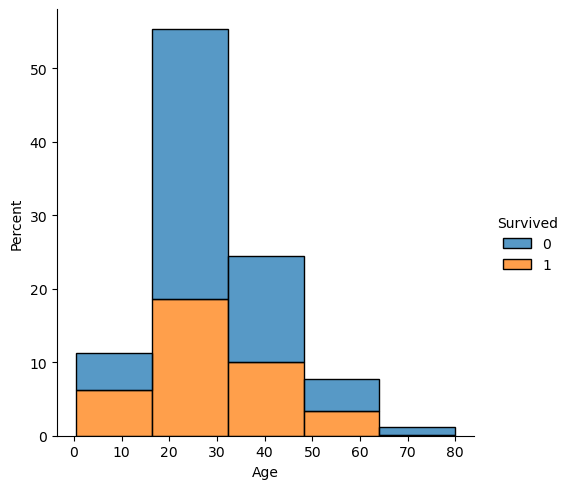

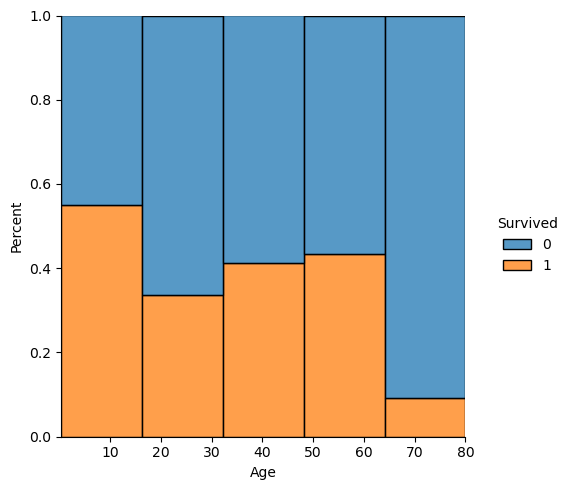

In [11]:
train_data['Age'] = train_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
sns.displot(train_data,x = 'Age', hue = 'Survived',binwidth = 17,height = 5,multiple = 'stack',stat = 'percent')
sns.displot(train_data,x = 'Age', hue = 'Survived',binwidth = 17,height = 5,multiple = 'fill',stat = 'percent')

In [12]:
def encodeAge(train):
    train.loc[train_data['Age'] <= 17,'Age']=0
    train.loc[ (train_data['Age'] >17)& (train_data['Age'] <= 32),'Age']=1
    train.loc[ (train_data['Age'] >32)& (train_data['Age'] <= 48),'Age']=2
    train.loc[ (train_data['Age'] >48)& (train_data['Age'] <=64),'Age']=3
    train.loc[ (train_data['Age'] >64)& (train_data['Age'] <= 80),'Age']=4
encodeAge(train_data)

def encodeAge(test):
    test.loc[test_data['Age'] <= 17,'Age']=0
    test.loc[ (test_data['Age'] >17)& (test_data['Age'] <= 32),'Age']=1
    test.loc[ (test_data['Age'] >32)& (test_data['Age'] <= 48),'Age']=2
    test.loc[ (test_data['Age'] >48)& (test_data['Age'] <= 64),'Age']=3
    test.loc[ (test_data['Age'] >64)& (test_data['Age'] <= 80),'Age']=4
encodeAge(test_data)

In [13]:
train_data.groupby(['Age'],as_index = False)['Survived'].mean()

,Age,Survived
0,0.0,0.539823
1,1.0,0.333333
2,2.0,0.412844
3,3.0,0.434783
4,4.0,0.090909


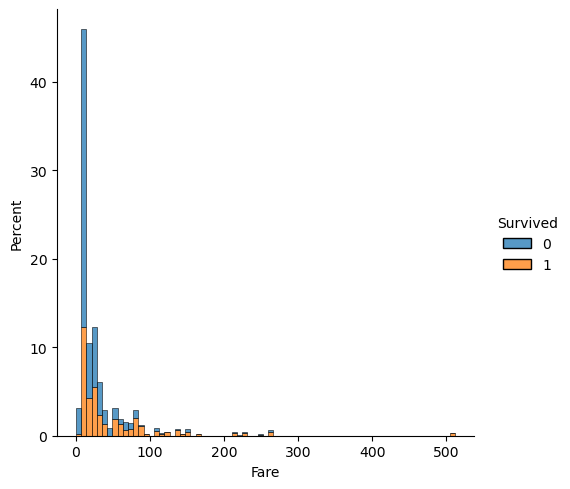

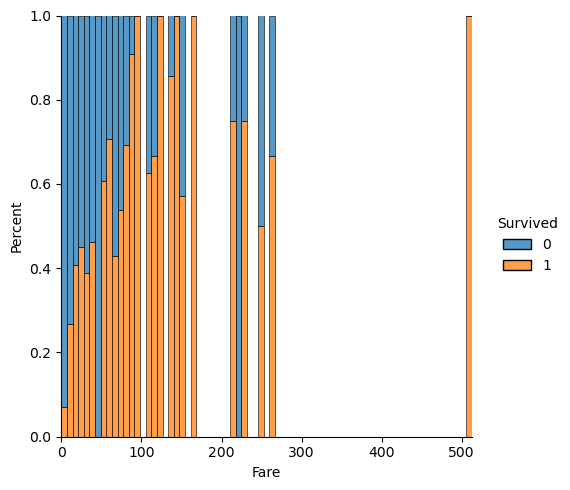

In [14]:
sns.displot(train_data, x='Fare',hue='Survived', binwidth = 7,height = 5,multiple = 'stack',stat = 'percent')
sns.displot(train_data, x='Fare',hue='Survived', binwidth = 7,height = 5,multiple = 'fill',stat = 'percent')

In [15]:
def encodeAge(train):
    train.loc[train_data['Fare'] <= 7,'Fare']=0
    train.loc[ (train_data['Fare'] >7) & (train_data['Fare'] <= 14),'Fare']=1
    train.loc[ (train_data['Fare'] >14) & (train_data['Fare'] <= 42.0),'Fare']=2
    train.loc[ (train_data['Fare'] >42.0) & (train_data['Fare'] <=512.329),'Fare']=3
    
encodeAge(train_data)

def encodeAge(test):
    test.loc[test_data['Fare'] <= 7,'Fare']=0
    test.loc[(test_data['Fare'] >7)& (train_data['Fare'] <= 14),'Fare']=1
    test.loc[(test_data['Fare'] >14)& (train_data['Fare'] <= 42.0),'Fare']=2
    test.loc[(test_data['Fare'] >42.0)& (train_data['Fare'] <512.329),'Fare']=3
encodeAge(test_data)

In [16]:
train_data.groupby(['Fare'], as_index = False)['Survived'].agg(["count","mean"])

,Fare,count,mean
0,0.0000,28,0.071429
1,1.0000,409,0.266504
2,2.0000,282,0.425532
3,3.0000,169,0.639053
4,512.3292,3,1.000000


In [17]:
train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [18]:
train_data['Title'] = train_data['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".",expand = True)[0].apply(lambda x:x.strip())
test_data['Title'] = test_data['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".",expand = True)[0].apply(lambda x:x.strip())

In [19]:
train_data.groupby(['Title'],as_index = False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


In [60]:
def get_title(name):
    title_map = {
        'Capt': 'Officers', 'Col': 'Officers', 'Major': 'Officers', 'Rev': 'Officers', 'Dr': 'Officers',
        'Mrs': 'Mrs', 'Mme': 'Mrs',
        'Miss': 'Miss', 'Ms': 'Miss', 'Mlle': 'Miss',
        'Master': 'Master',
        'Mr':'Mr'
    }
    
    # Extract title and return mapped title
    if "," in name and "." in name:
        title = name.split(",")[1].split()[0].replace('.', '')  # Extract title after ","
    else:
        title = name.split()[0].replace('.', '')  # Default extraction
    
    return title_map.get(title, 'Other')  # Default to 'Other' if the title is missing

train_data['Title'] = train_data['Name'].apply(get_title)

In [62]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fam_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,1.0,NaN,S,2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,3.0,C85,C,2,Small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Solo,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,3.0,C123,S,2,Small,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,1.0,NaN,S,1,Solo,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1.0,0,0,211536,1.0,NaN,S,1,Solo,Officers
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,2.0,B42,S,1,Solo,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1,2,W./C. 6607,2.0,NaN,S,4,Small,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,2.0,C148,C,1,Solo,Mr


In [27]:
test_data['Title'] = test_data['Name'].apply(get_title)

In [64]:
train_data.groupby(['Title'], as_index=False).agg(
    count=('Survived', 'count'),
    mean=('Survived', 'mean')
)


,Title,count,mean
0,Master,40,0.575000
1,Miss,185,0.702703
2,Mr,517,0.156673
3,Mrs,126,0.793651
4,Officers,18,0.277778
5,Other,5,0.600000


## Data Cleaning

In [82]:
train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode()[0])
test_data.Embarked = test_data.Embarked.fillna(test_data.Embarked.mode()[0])
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Fam_type',
       'Title'],
      dtype='object')

In [84]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_type,Title
0,0,3,male,1.0,1.0,S,Small,Mr
1,1,1,female,2.0,3.0,C,Small,Mrs
2,1,3,female,1.0,1.0,S,Solo,Miss
3,1,1,female,2.0,3.0,S,Small,Mrs
4,0,3,male,2.0,1.0,S,Solo,Mr


## Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
train_data["Sex"]= LabelEncoder().fit_transform(train_data["Sex"])
train_data["Embarked"]= LabelEncoder().fit_transform(train_data["Embarked"])
train_data["Fam_type"]= LabelEncoder().fit_transform(train_data["Fam_type"])
train_data["Title"]= LabelEncoder().fit_transform(train_data["Title"])

test_data["Sex"]= LabelEncoder().fit_transform(test_data["Sex"])
test_data["Embarked"]= LabelEncoder().fit_transform(test_data["Embarked"])
test_data["Fam_type"]= LabelEncoder().fit_transform(test_data["Fam_type"])
test_data["Title"]= LabelEncoder().fit_transform(test_data["Title"])

## Feature Selection

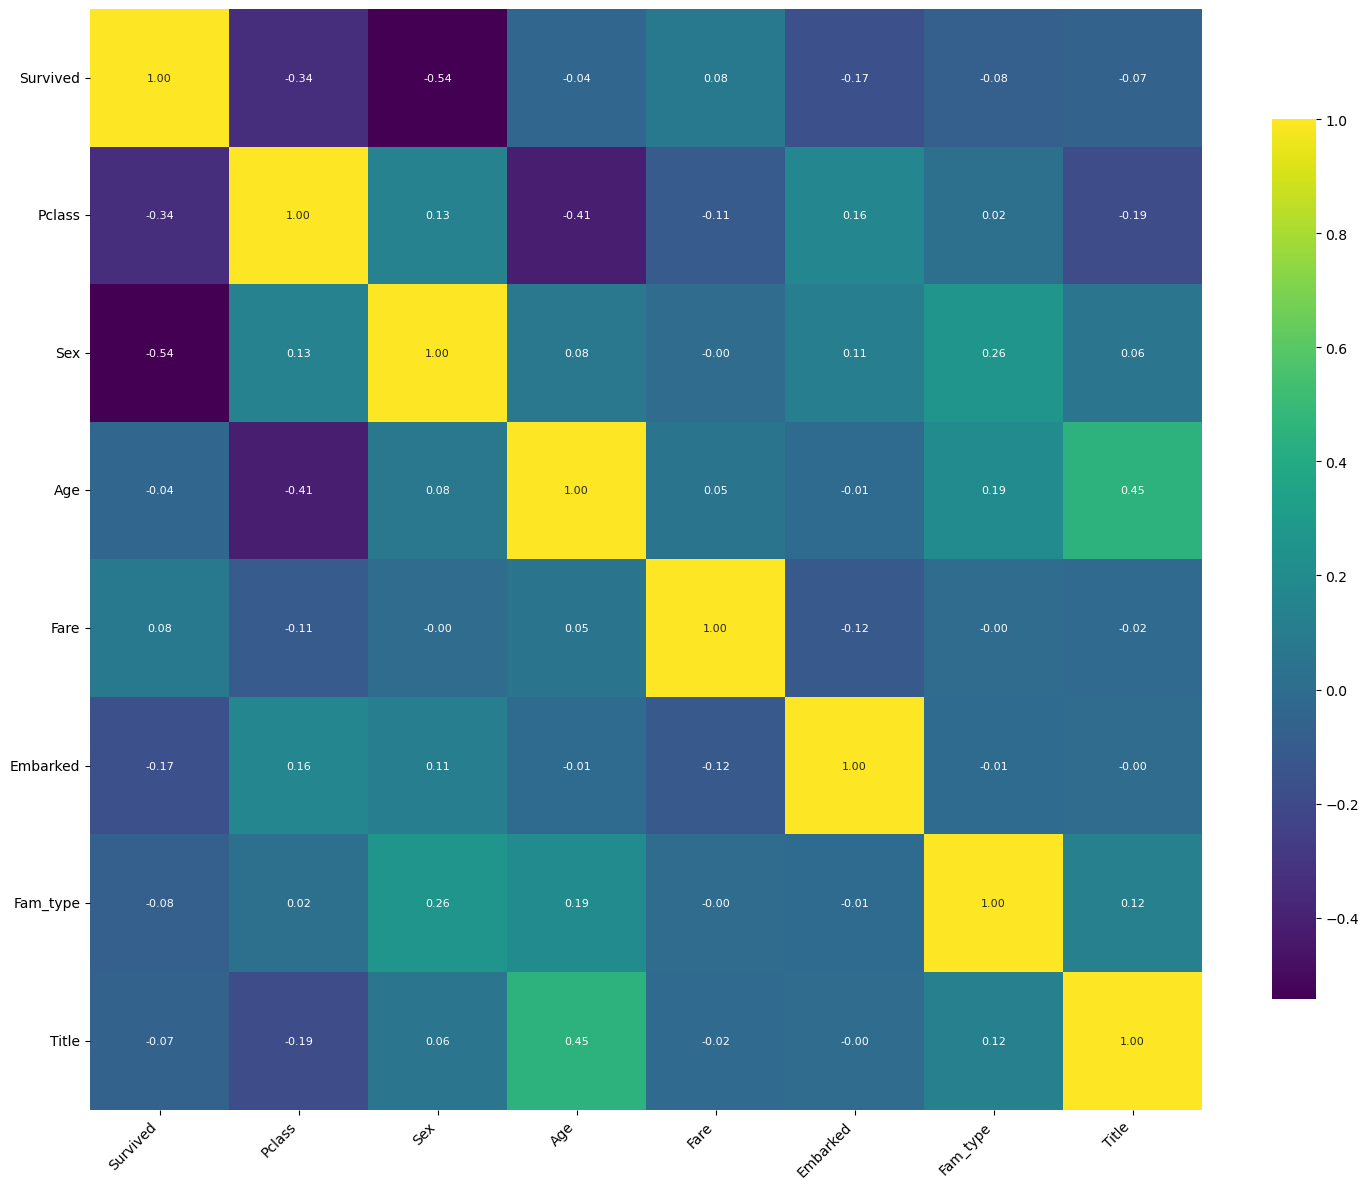

In [92]:
import matplotlib.pyplot as plt
correlation_matrix = train_data.corr(numeric_only = True)
plt.figure(figsize = (15,12))
heatmap = sns.heatmap(correlation_matrix,
                      annot = True,
                      cmap ='viridis',
                      fmt = ".2f",
                      annot_kws = {"size":8},
                      cbar_kws = {"shrink":0.8})
plt.xticks(rotation = 45,ha='right',fontsize = 10)
plt.yticks(rotation = 0,fontsize = 10)
plt.tight_layout()
plt.show()

In [96]:
train_data = train_data.loc[:,['Survived','Pclass','Sex','Embarked','Age','Fare','Fam_type','Title']]
test_data = test_data.loc[:,['Pclass','Sex','Embarked','Age','Fare','Fam_type','Title']]

## Data Splitting,Model Selection &Training

In [99]:
X = train_data.iloc[:,1:].values
y = train_data.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## Model Evaluation

In [110]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 10,n_estimators = 200)
rf_model = rfc.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

